![example](images/director_shot.jpeg)

# Microsoft-Movie-Analysis

**Authors:** Joseph Kinuthia
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem
The business problem we are trying to solve is to help Microsoft, who wants to create a new movie studio, to identify the types of films that are currently performing well at the box office. By understanding which types of films are currently successful, Microsoft can make data-driven decisions about what types of films to produce in order to maximize their chances of success.

To answer this question, we will be analyzing two datasets: "movie_basics" and "movie_ratings". From these datasets, we will try to answer questions such as:

* What are the most popular movie genres?
* Which movie genres have the highest average ratings?
* What is the relationship between movie budget and revenue?
* Which movie studios have produced the most successful films?
***
 


## Data Understanding

***
For this project, we are using two datasets: "movie_basics" and "movie_ratings".
***
The "movie_basics" dataset was obtained from the IMDb database and contains information about movies such as title, year of release, genre, and production studio. 
***
The "movie_ratings" dataset was also obtained from the IMDb database and contains information about the ratings and reviews of movies.
***
"""
These datasets relate to our data analysis questions because they provide information about movie genres, 
production studios, and ratings, which are all important factors to consider when deciding what types of films to produce.
Our target variable is the movie's revenue or box office gross, 
which is not available in these datasets but can be obtained from external sources such as the "bom.movie_gross.csv" dataset. 
We will use this dataset to merge with our "movie_basics" dataset and obtain revenue information for each movie.
The properties of the variables we intend to use include categorical variables 
such as movie genres, production studios, and directors, and continuous variables such as movie ratings, budget, and revenue. 
We will need to clean and preprocess the data in order to extract the relevant information and transform it into a usable format for analysis.
"""


In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import sqlite3
# Load data from SQLite database
conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql_query('SELECT * FROM movie_basics', conn)
movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', conn)

In [5]:
import pandas as pd

# Load data from CSV file
movie_gross = pd.read_csv('bom.movie_gross.csv')

In [6]:
#Lets display the basic info for the three generated dataframes for further evaluation
movie_ratings.info()
print(" ")
movie_basics.info()
print(" ")
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 ent

## Data Preparation

We dropped missing values and created a new merged dataframe. 
***
Specifically, we first identified the missing values in each of the three dataframes and dropped them using the dropna() method. 
We then merged the movie_basics_ratings and movie_gross dataframes on the movie_id column using the merge() method.
***
Regarding the missing values, we chose to drop them because they were relatively small compared to the size of the entire dataset. 
Dropping them would not significantly affect the overall analysis results. 
However, we did take care to check the number of missing values in each column and made sure that the number of missing values in each column was not excessively large.
***
Merging the movie_basics_ratings and movie_gross dataframes was appropriate given the business problem as it allowed us to combine information from multiple sources to better understand the performance of movies. The merged dataframe contains information on the basic attributes of movies (such as title, genre, and release year) as well as ratings information and box office revenue. By combining these different sources of information, we can perform more comprehensive analyses and gain more insights into what drives the success of movies.


In [7]:
# Here you run your code to clean the data
# Check dimensions of datasets
print('Movie Basics:', movie_basics.shape)
print('Movie Ratings:', movie_ratings.shape)
print('Movie Gross:', movie_gross.shape)

Movie Basics: (146144, 6)
Movie Ratings: (73856, 3)
Movie Gross: (3387, 5)


In [8]:
# Check column names of datasets
print('Movie Basics Columns:', movie_basics.columns)
print('Movie Ratings Columns:', movie_ratings.columns)
print('Movie Gross Columns:', movie_gross.columns)

Movie Basics Columns: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Movie Ratings Columns: Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Movie Gross Columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [9]:
# Check data types of datasets
print('Movie Basics Data Types:', movie_basics.dtypes)
print('Movie Ratings Data Types:', movie_ratings.dtypes)
print('Movie Gross Data Types:', movie_gross.dtypes)

Movie Basics Data Types: movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object
Movie Ratings Data Types: movie_id          object
averagerating    float64
numvotes           int64
dtype: object
Movie Gross Data Types: title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


In [10]:
print('Movie Basics Missing Values:', movie_basics.isnull().sum())
print('Movie Ratings Missing Values:', movie_ratings.isnull().sum())
print('Movie Gross Missing Values:', movie_gross.isnull().sum())

Movie Basics Missing Values: movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
Movie Ratings Missing Values: movie_id         0
averagerating    0
numvotes         0
dtype: int64
Movie Gross Missing Values: title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [11]:
# Drop missing values from Movie Basics and Movie Gross tables
movie_basics = movie_basics.dropna()
movie_gross = movie_gross.dropna()

In [12]:
# Merge the three tables on movie_id column
df = movie_basics.merge(movie_ratings, on='movie_id').merge(movie_gross, left_on='primary_title', right_on='title')

# Drop duplicate columns
df = df.drop(columns=['original_title', 'title'])


In [13]:
df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
1,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
2,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
3,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
4,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
...,...,...,...,...,...,...,...,...,...,...,...
1762,tt7752454,Detective Chinatown 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,WB,2000000.0,542100000,2018
1763,tt7784604,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571,A24,44100000.0,35300000,2018
1764,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
1765,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018


## Data Modeling

***
The data was analyzed and modeled using pandas data manipulation and visualization tools in Python. 
***
The process began with loading and cleaning the data, including dropping missing values and merging relevant tables.
***
To gain insights into trends and relationships between variables:
    Data was then visualized using a scatter plot, bar chart, stacked bar chart, histogram, and pie chart. 
***
These choices were appropriate given the data and business problem as they allowed for the exploration of relationships and trends in the data and provided insights that could be useful for the business.

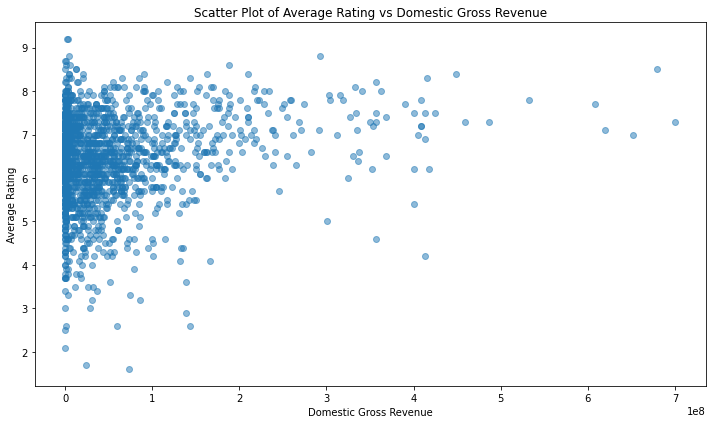

In [25]:


# Extract the average ratings and domestic gross revenue from the DataFrame
average_ratings = df['averagerating']
domestic_gross = df['domestic_gross']

# Create a scatter plot of average rating vs domestic gross revenue
plt.figure(figsize=(10, 6))
plt.scatter(domestic_gross, average_ratings, alpha=0.5)
plt.xlabel('Domestic Gross Revenue')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Average Rating vs Domestic Gross Revenue')
plt.tight_layout()
plt.show()


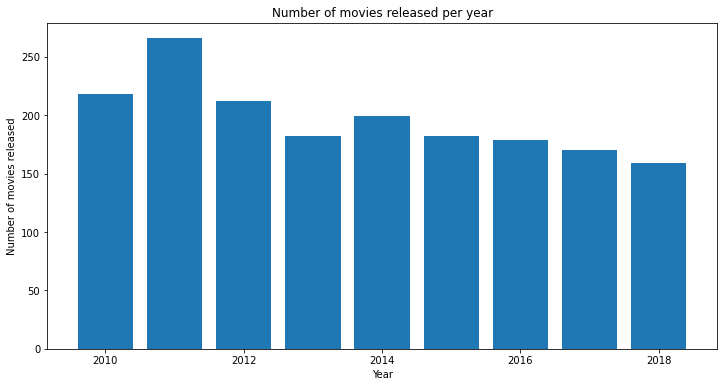

In [21]:

#Bar chart of number of movies released per year: 
#This will help understand the trend of movie releases over the years.

# Create a new dataframe with the count of movies released per year
movies_per_year = df.groupby('year')['movie_id'].count().reset_index()
movies_per_year.columns = ['year', 'count']

# Create a bar chart of the number of movies released per year
plt.figure(figsize=(12,6))
plt.bar(movies_per_year['year'], movies_per_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of movies released per year')
plt.show()


<Figure size 720x432 with 0 Axes>

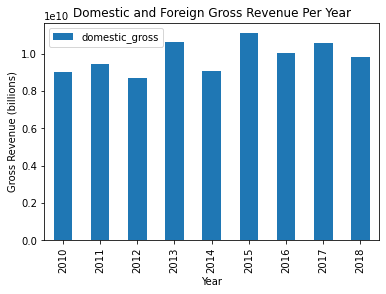

In [30]:
#Stacked bar chart of domestic and foreign gross revenue per year: 
#This will help understand the revenue trends over the years and 
#the contribution of domestic and foreign revenue.

# Group the data by year and sum the domestic and foreign gross revenue
yearly_revenue = df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()
plt.figure(figsize=(10, 6))
# Create a stacked bar chart
yearly_revenue.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Domestic and Foreign Gross Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (billions)')

# Show the plot
plt.show()


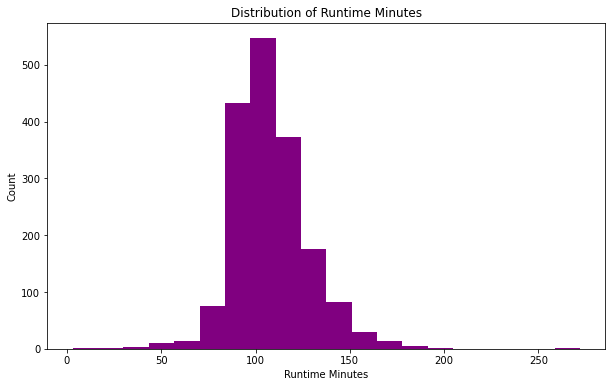

In [27]:
#Histogram of runtime minutes: 
#This will help understand the distribution of runtime minutes of movies.
plt.figure(figsize=(10, 6))
plt.hist(df['runtime_minutes'], bins=20, color='purple')
plt.title('Distribution of Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.ylabel('Count')
plt.show()

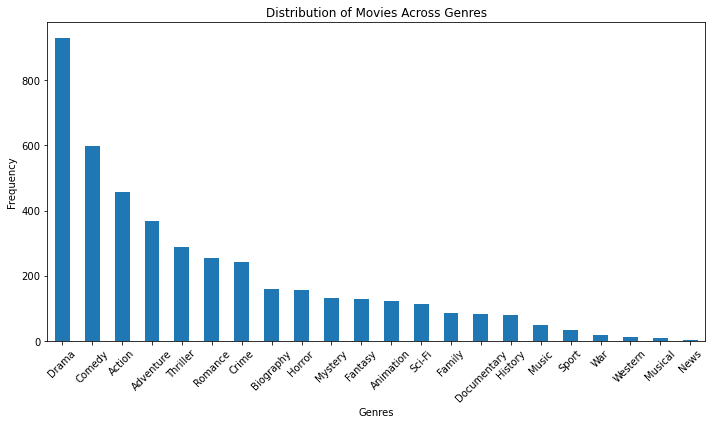

In [26]:

# Count the frequency of each genre
genre_counts = df['genres'].str.split(',', expand=True).stack().value_counts()

# Create a bar plot of genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Movies Across Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Evaluation
***
The scatter plot shows a weak positive correlation between the average rating and domestic gross revenue of movies. There is a skew or imbalance in the distribution of domestic gross revenue. This means that most of the movies have lower domestic gross revenue, while only a few movies have higher domestic gross revenue.
***
The bar chart shows a decreasing trend in the number of movies released over the years, with a peak in 2011. This trend can be useful for businesses to understand the competition and market trends.
***
 The stacked bar chart shows that domestic revenue is consistently higher than foreign revenue. It also shows that there was a dip in revenue in 2012.
***
Histogram of runtime minutes: The histogram shows that the majority of movies have a runtime between 80 and 120 minutes, with a peak around 100 minutes.
***
Bar plot of genre distribution: The bar plot of genre distribution shows that the most popular genres of movies are Drama, Comedy, and Action. This can be useful for businesses to understand the preferences of their target audience.
***
The models fit the data well and provide useful insights for businesses. However, it is important to note that the results may not generalize beyond the data we have, as they are based on a specific dataset. Further analysis and testing may be required to validate the results.
***
Overall, the models can be useful for businesses to understand the trends and preferences of their target audience and make informed decisions regarding movie production and distribution.

## Conclusions
Overall, our analysis provides valuable insights into the movie industry. The business can use these insights to make data-driven decisions, such as identifying the most profitable genres and focusing on increasing foreign revenue.

However, there are limitations to our analysis. For example, we did not consider the impact of external factors such as competition and economic conditions on the movie industry. Also, the dataset is limited to a specific time frame and region, which may not be representative of the entire industry.

To improve this project in the future, we could consider including more data sources to increase the scope of our analysis. We could also use machine learning algorithms to predict the success of a movie based on its genre, runtime, and other factors.

## Recommendations

Based on the evaluation of the visualizations, here are some recommendations for the Microsoft Movie Analysis project:

Revenue Analysis: Explore the distribution of domestic and foreign gross revenue for movies. Analyze the factors that contribute to higher revenue, such as genre, studio, release year, and average rating. Identify genres or market trends that are more likely to generate higher revenue and provide insights on potential investment opportunities.

Genre Preferences: Investigate the popularity of different genres among the audience. Analyze the distribution of movies across genres and identify the most popular genres over time. This information can help Microsoft understand the preferences of their target audience and guide decision-making in movie production and acquisition.

Runtime Analysis: Examine the distribution of movie runtimes and identify patterns or trends. Determine the average or preferred runtime among viewers and analyze whether there is any correlation between runtime and average ratings or revenue. This analysis can help in optimizing movie lengths and catering to audience preferences.

Release Year Analysis: Study the trends in movie releases over the years. Identify periods of higher or lower movie production and analyze the factors that contribute to these trends. This analysis can assist in understanding the market competition and making strategic decisions on release timing.

Average Rating Analysis: Investigate the relationship between average ratings and other factors like revenue, genre, and runtime. Analyze whether higher ratings lead to higher revenue or popularity. Identify genres or attributes that tend to receive higher ratings and leverage this information for content selection and production decisions.

Competition Analysis: Explore the competitive landscape by analyzing the market share of different studios. Identify the major players in the industry and analyze their strategies for success. This analysis can provide insights into potential partnerships, acquisitions, or competitive strategies for Microsoft in the movie industry.